In [18]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv


In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [21]:
df = pd.read_csv('/content/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
print("Dataset Shape:", df.shape)

Dataset Shape: (891, 12)


In [23]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


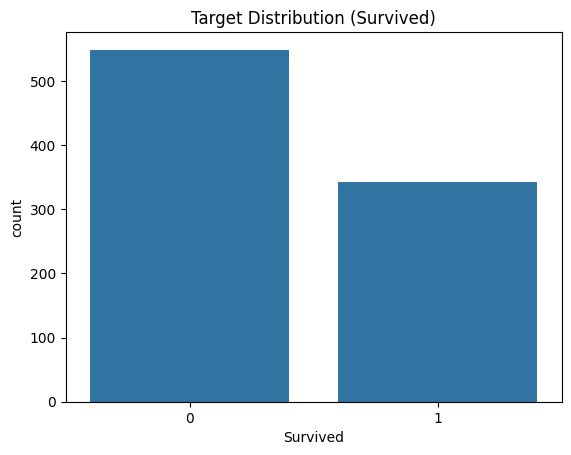

In [25]:
# Plot target distribution
sns.countplot(x='Survived', data=df)
plt.title("Target Distribution (Survived)")
plt.show()

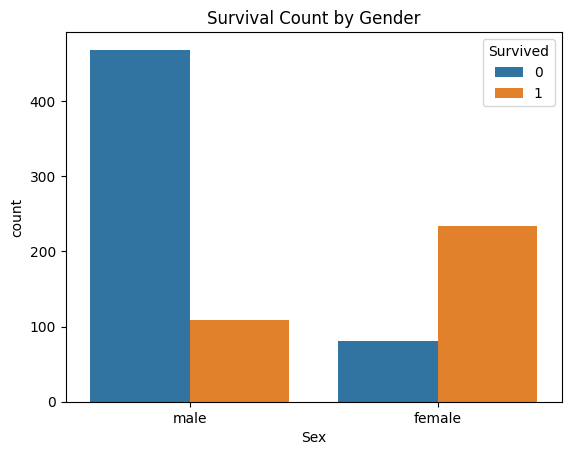

In [26]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()

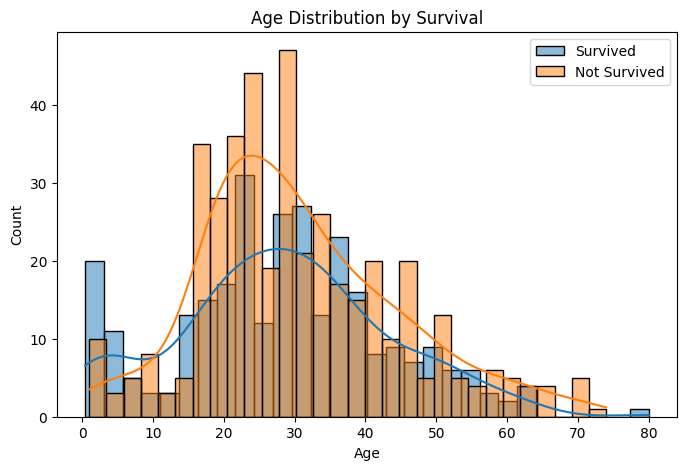

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, label='Not Survived')
plt.legend()
plt.title("Age Distribution by Survival")
plt.show()

In [28]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop columns not useful for baseline model
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

/tmp/ipython-input-3965310283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3965310283.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [29]:
# Convert categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [30]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

Train shape: (712, 8)
Validation shape: (179, 8)


In [31]:
dt_model = DecisionTreeClassifier(
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Predictions
y_pred = dt_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.7821229050279329


In [33]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

